# Class 4 Lab: K-nearest neighbors and scikit-learn

## Agenda

- **K-nearest neighbors (KNN)**
    - Review of the iris dataset
    - Visualizing the iris dataset
    - KNN classification
    - Review of supervised learning
- **scikit-learn**
    - Requirements for working with data in scikit-learn
    - scikit-learn's 4-step modeling pattern
    - Tuning a KNN model
    - Comparing KNN with other models

## The iris dataset

In [69]:
# read the iris data into a DataFrame
import pandas as pd
col_names = ['FIX', 'Oasys', 'Result']
Allocation = pd.read_csv('../homework/FixAllocation.csv', header=None, names=col_names)


In [70]:
Allocation.head()

,FIX,Oasys,Result
0,Yes,No,Medium
1,Yes,Yes,High
2,No,No,Low
3,No,Yes,Low


### Terminology

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

![iris](images/iris_petal_sepal.png)

### Let's plot the iris dataset

...and see what we can learn.

In [78]:
# allow plots to appear in the notebook
%matplotlib inline

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['r', 'g', 'b'])

# map each iris species to a number
Allocation['FIX_num'] = Allocation.FIX.map({'No':0, 'Yes':1})
Allocation['Oasys_num'] = Allocation.Oasys.map({'No':0, 'Yes':1})
Allocation['Result_num'] = Allocation.Result.map({'Low':10, 'Medium':20, 'High':30})


In [72]:
Allocation.head()

,FIX,Oasys,Result,FIX_num,Oasys_num,Result_num
0,Yes,No,Medium,1,0,20
1,Yes,Yes,High,1,1,30
2,No,No,Low,0,0,10
3,No,Yes,Low,0,1,10


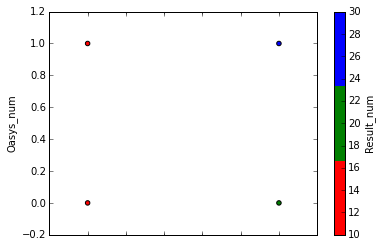

In [111]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
Allocation.plot(kind='scatter', x='FIX_num', y='Oasys_num', c='Result_num',  colormap=cmap_bold)

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

### KNN classification map for iris (K=1)

![1NN classification map](images/iris_01nn_map.png)

### KNN classification map for iris (K=5)

![5NN classification map](images/iris_05nn_map.png)

### KNN classification map for iris (K=15)

![15NN classification map](images/iris_15nn_map.png)

### KNN classification map for iris (K=50)

![50NN classification map](images/iris_50nn_map.png)

**Question:** What's the "best" value for K in this case?

**Answer:** The value which produces the most accurate predictions on unseen data. We want to create a model that generalizes!

## Review of supervised learning

![Supervised learning diagram](images/supervised_learning.png)

## Requirements for working with data in scikit-learn

1. Features and response are **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily convertible to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

In [82]:
Allocation.head()

,FIX,Oasys,Result,FIX_num,Oasys_num,Result_num
0,Yes,No,Medium,1,0,20
1,Yes,Yes,High,1,1,30
2,No,No,Low,0,0,10
3,No,Yes,Low,0,1,10


In [84]:
# store feature matrix in "X"
feature_cols = ['FIX_num', 'Oasys_num']
X = Allocation[feature_cols]

In [ ]:
# alternative ways to create "X"
#X = iris.drop(['species', 'species_num'], axis=1)
#X = iris.loc[:, 'sepal_length':'petal_width']
#X = iris.iloc[:, 0:4]

In [85]:
# store response vector in "y"
y = Allocation.Result_num

In [86]:
# check X's type
print type(X)
print type(X.values)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [87]:
print X.values

[[1 0]
 [1 1]
 [0 0]
 [0 1]]


In [88]:
# check y's type
print type(y)
print type(y.values)

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [89]:
print y.values

[20 30 10 10]


In [90]:
# check X's shape (n = number of observations, p = number of features)
print X.shape

(4, 2)


In [91]:
# check y's shape (single dimension with length n)
print y.shape

(4,)


## scikit-learn's 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [92]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [93]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults
- **QUESTION: How do we know what those defaults are? How do we even know what all the parameters are?**

**Step 3:** Fit the model with data 

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Subtlety: In general, this is training the model, although "instance-based" models such as KNN don't really have a training step.

In [94]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

- Once a model has been fit with data, it's called a "fitted model"

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Model uses the information it learned during the fitting / training process

In [102]:
knn.predict([0,0])

array([10])

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observations at once

In [103]:
X_new = [[0,1], [1,0]]
knn.predict(X_new)

array([10, 20])

## Tuning a KNN model

In [106]:
# instantiate the model (using the value K=3)
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([10, 10])

In [107]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

array([[ 0.66666667,  0.        ,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

In [110]:
# print distances to nearest neighbors (and their identities)
knn.kneighbors([1, 1])

(array([[ 0.,  1.,  1.]]), array([[1, 0, 3]]))

## Comparing KNN with other models

Advantages of KNN:

- Simple to understand and explain
- Model fitting is fast
- Can be used for classification and regression!

Disadvantages of KNN:

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data. Feature scaling is important!
- Accuracy is (generally) not competitive with the best supervised learning methods